****
****
****
##  **<span style='color:red;'> PROJET DE PYTHON POUR L'ANNEE ACCADEMIQUE 2023-2024 </span>**
##  **<span style='color:red;'> NOM DES PARTICIPANTS </span> : AFADONOU KOKOUVI ET FATIMATA BINTOU FAYE**
##  **<span style='color:red;'> NOM DE L'ENSEIGNANT </span>: ALEXANDRE WAREMBOURG**









****
## ***<span style='color:violet;'> Notre projet vise à analyser les tendances et les facteurs de risque associés aux accidents de la circulation impliquant des piétons et des cyclistes dans les divers arrondissements. Ensuite, nous développerons un modèle permettant de prédire si le fait d'emprunter une rue à des heures spécifiques, un jour donné de la semaine et pendant un mois particulier accroît le risque d'accident </span>***.
****

#### Importation des packages nécessaires pour la manipulation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

#### Importation et affichage deux cinqs premieres lignes des deux jeux de données qui feront l'objet de notre analyse

In [2]:
collision_type = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\collision_type.csv", sep ="|")
person_crash = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\person_crash.csv", sep = "|")

C:\Users\pc\AppData\Local\Temp\ipykernel_3712\2489172070.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  person_crash = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\person_crash.csv", sep = "|")


In [3]:
person_crash.head()

,Unnamed: 0,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,borough,zip_code,latitude,longitude,location,cross_street_name
0,0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,2,0,4455765,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,1,0,4513547,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,0,0,4541903,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0.0,0.0,0,0,0,0,0,0,4456314,BROOKLYN,11208.0,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86...",1211 LORING AVENUE
4,4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,0,0,0,4486609,BROOKLYN,11233.0,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN


## Détail du nom des variables dans le jeu de donnée person_crash

1.  **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time**: L'heure à laquelle l'accident s'est produit.
3. **on_street_name**: Le nom de la rue où l'accident s'est produit.
4. **off_street_name**: Le nom de la rue adjacente où l'accident s'est produit, s'il y en a une.
5. **number_of_persons_injured**: Le nombre total de personnes blessées dans l'accident.
6. **number_of_persons_killed**: Le nombre total de personnes tuées dans l'accident.
7. **number_of_pedestrians_injured**: Le nombre de piétons blessés dans l'accident.
8. **number_of_pedestrians_killed**: Le nombre de piétons tués dans l'accident.
9. **number_of_cyclist_injured**: Le nombre de cyclistes blessés dans l'accident.
10. **number_of_cyclist_killed**: Le nombre de cyclistes tués dans l'accident.
11. **number_of_motorist_injured**: Le nombre de conducteurs blessés dans l'accident.
12. **number_of_motorist_killed**: Le nombre de conducteurs tués dans l'accident.
13. **collision_id**: L'identifiant unique de la collision.
14. **borough**: Le quartier de la ville où l'accident s'est produit.
15. **zip_code**: Le code postal de la zone où l'accident s'est produit.
16. **latitude**: La latitude de l'emplacement de l'accident.
17. **longitude**: La longitude de l'emplacement de l'accident.
18. **location**: La localisation précise de l'accident.
19. **cross_street_name**: Le nom de la rue transversale où l'accident s'est produit.

In [4]:
collision_type.head()

,Unnamed: 0,crash_date,crash_time,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5
0,0,2021-09-11T00:00:00.000,2:39,4455765,Sedan,Sedan,NaN,NaN,NaN,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN
1,1,2022-03-26T00:00:00.000,11:45,4513547,Sedan,NaN,NaN,NaN,NaN,Pavement Slippery,NaN,NaN,NaN,NaN
2,2,2022-06-29T00:00:00.000,6:55,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3,2021-09-11T00:00:00.000,9:35,4456314,Sedan,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN
4,4,2021-12-14T00:00:00.000,8:13,4486609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Détail du nom des variables dans le jeu de données collision_type

1. **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time** : L'heure à laquelle l'accident s'est produit.
3. **collision_id** : L'identifiant unique de la collision.
4. **vehicle_type_code1** : Le code du type de véhicule impliqué dans l'accident (premier véhicule).
5. **vehicle_type_code2** : Le code du type de véhicule impliqué dans l'accident (deuxième véhicule).
6. **vehicle_type_code_3** : Le code du type de véhicule impliqué dans l'accident (troisième véhicule, le cas échéant).
7. **vehicle_type_code_4** : Le code du type de véhicule impliqué dans l'accident (quatrième véhicule, le cas échéant).
8. **vehicle_type_code_5** : Le code du type de véhicule impliqué dans l'accident (cinquième véhicule, le cas échéant).
9. **contributing_factor_vehicle_1** : Le facteur contributif principal à l'accident pour le premier véhicule impliqué.
10. **contributing_factor_vehicle_2** : Le facteur contributif principal à l'accident pour le deuxième véhicule impliqué.
11. **contributing_factor_vehicle_3** : Le facteur contributif principal à l'accident pour le troisième véhicule impliqué.
12. **contributing_factor_vehicle_4** : Le facteur contributif principal à l'accident pour le quatrième véhicule impliqué.
13. **contributing_factor_vehicle_5** : Le facteur contributif principal à l'accident pour le cinquième véhicule impliqué.

### I. Inspection des deux jeux de données

In [3]:
collision_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Unnamed: 0                     int64 
 1   crash_date                     object
 2   crash_time                     object
 3   collision_id                   int64 
 4   vehicle_type_code1             object
 5   vehicle_type_code2             object
 6   vehicle_type_code_3            object
 7   vehicle_type_code_4            object
 8   vehicle_type_code_5            object
 9   contributing_factor_vehicle_1  object
 10  contributing_factor_vehicle_2  object
 11  contributing_factor_vehicle_3  object
 12  contributing_factor_vehicle_4  object
 13  contributing_factor_vehicle_5  object
dtypes: int64(2), object(12)
memory usage: 213.6+ MB


##### Dans notre ensemble de données sur les types de collisions, une enquête a été menée auprès de 2 000 000 d'individus, avec 14 variables comprenant 2 variables quantitatives et 12 variables qualitatives. Ce jeu de données occupe une mémoire de 213,6 mégabits.

In [6]:
person_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   crash_date                     object 
 2   crash_time                     object 
 3   on_street_name                 object 
 4   off_street_name                object 
 5   number_of_persons_injured      float64
 6   number_of_persons_killed       float64
 7   number_of_pedestrians_injured  int64  
 8   number_of_pedestrians_killed   int64  
 9   number_of_cyclist_injured      int64  
 10  number_of_cyclist_killed       int64  
 11  number_of_motorist_injured     int64  
 12  number_of_motorist_killed      int64  
 13  collision_id                   int64  
 14  borough                        object 
 15  zip_code                       object 
 16  latitude                       float64
 17  longitude                      float64
 18  lo

##### Dans notre jeu de données portant sur les personnes accidentées, une enquête a été menée auprès de 2 000 000 d'individus, comprenant 20 variables dont 12 sont des variables quantitatives et 8 sont des variables qualitatives. Ce jeu de données occupe une mémoire de 305,2 mégaoctets.

## 1.1. Visualisation des valeurs manquantes et voir s'il y a des possibilités de les traiter avec les différentes méthodes vues aux cours

In [7]:
person_crash.isnull().sum()/(len(person_crash))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
on_street_name                   20.97965
off_street_name                  37.28745
number_of_persons_injured         0.00090
number_of_persons_killed          0.00155
number_of_pedestrians_injured     0.00000
number_of_pedestrians_killed      0.00000
number_of_cyclist_injured         0.00000
number_of_cyclist_killed          0.00000
number_of_motorist_injured        0.00000
number_of_motorist_killed         0.00000
collision_id                      0.00000
borough                          31.09410
zip_code                         31.10600
latitude                         11.41525
longitude                        11.41525
location                         11.41525
cross_street_name                83.63900
dtype: float64

In [3]:
# Visualiser les valeurs manquantes  pour la base collision_type
collision_type.isnull().sum()/(len(collision_type))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
collision_id                      0.00000
vehicle_type_code1                0.62245
vehicle_type_code2               18.55585
vehicle_type_code_3              93.17940
vehicle_type_code_4              98.47195
vehicle_type_code_5              99.58695
contributing_factor_vehicle_1     0.31305
contributing_factor_vehicle_2    15.19765
contributing_factor_vehicle_3    92.93620
contributing_factor_vehicle_4    98.41985
contributing_factor_vehicle_5    99.57450
dtype: float64

## 1.2. Sélection des variables pour faire notre analyse; dans le jeu de données collision_type, nous allons éliminer la colonne des vehicules 3; 4 et 5 car elles presentent plus 80% des valeurs manquantes

In [4]:
# Séléction des variables dans le jeu de donnée "collision_type"
collision_type = collision_type[["crash_date","crash_time","collision_id","vehicle_type_code1","contributing_factor_vehicle_1",'vehicle_type_code2',
                                'contributing_factor_vehicle_2']]
# Convertission de la colonne "carsh_date" en type de données datetime
collision_type["crash_date"] = pd.to_datetime(collision_type["crash_date"])

# Ensuite, extrayez la date en tant que chaîne de caractères
#collision_type["crash_date"] = collision_type["crash_date"].dt.date.astype(str)
collision_type.head()

,crash_date,crash_time,collision_id,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2
0,2021-09-11,2:39,4455765,Sedan,Aggressive Driving/Road Rage,Sedan,Unspecified
1,2022-03-26,11:45,4513547,Sedan,Pavement Slippery,NaN,NaN
2,2022-06-29,6:55,4541903,Sedan,Following Too Closely,Pick-up Truck,Unspecified
3,2021-09-11,9:35,4456314,Sedan,Unspecified,NaN,NaN
4,2021-12-14,8:13,4486609,NaN,NaN,NaN,NaN


In [5]:
# Séléction des variables dans le jeu de donnée "person_crash"
person_crash = person_crash[["crash_date","crash_time","on_street_name","number_of_persons_injured","number_of_persons_killed",
"number_of_pedestrians_injured","number_of_pedestrians_killed","number_of_cyclist_injured","number_of_cyclist_killed","number_of_motorist_injured",
"number_of_motorist_killed","borough","latitude","longitude","location"]] 


In [6]:
# Convertissons de la colonne "carsh_date" en type de données datetime
person_crash["crash_date"] = pd.to_datetime(person_crash["crash_date"])

# Ensuite, extrayez la date en tant que chaîne de caractères
#person_crash["crash_date"] = person_crash["crash_date"].dt.date.astype(str)
person_crash.head()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,borough,latitude,longitude,location
0,2021-09-11,2:39,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,NaN,NaN,NaN,NaN
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,2021-09-11,9:35,NaN,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86..."
4,2021-12-14,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91..."


## 1.3. Traitement des données manquantes dans le jeu de données "collision_type"

En examinant la représentation graphique des données manquantes dans l'ensemble de données "collision_type", nous sommes en mesure de remédier aux lacunes observées dans les colonnes "vehicle_type_code1", "contributing_factor_vehicle_1",'vehicle_type_code2',
'contributing_factor_vehicle_2'en appliquant la méthode de propagation de la dernière valeur observée. Cette décision repose sur l'hypothèse selon laquelle, en cas d'accident à un moment donné et en un endroit spécifique, la probabilité que celui-ci se produise à ce même moment est significative.

In [7]:
# Imputation des valeurs manquantes pour vehicle_type_code1 et contributing_factor_vehicle_1 par la valeur la plus fréquente
most_frequent_vehicle_type_code1 = collision_type['vehicle_type_code1'].mode()[0]
collision_type['vehicle_type_code1'].fillna(most_frequent_vehicle_type_code1, inplace=True)

most_frequent_contributing_factor_vehicle_1 = collision_type['contributing_factor_vehicle_1'].mode()[0]
collision_type['contributing_factor_vehicle_1'].fillna(most_frequent_contributing_factor_vehicle_1, inplace=True)

# Imputation des valeurs manquantes pour vehicle_type_code2 et contributing_factor_vehicle_2 par une valeur par défaut (par exemple, 'Unknown')
collision_type['vehicle_type_code2'].fillna('Unknown', inplace=True)
collision_type['contributing_factor_vehicle_2'].fillna('Unknown', inplace=True)

# Vérification des valeurs manquantes après l'imputation
print(collision_type.isnull().sum())

crash_date                       0
crash_time                       0
collision_id                     0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
vehicle_type_code2               0
contributing_factor_vehicle_2    0
dtype: int64


#### Dans l'ensemble du jeu de données "person_crash", nous envisageons appliquer la méthode d'imputation des valeurs manquantes par la mediane pour la valeurs numerique et par inconnu les valeurs textuelles

In [8]:
# Imputation pour les variables numériques
numeric_columns = ['number_of_persons_injured', 'number_of_persons_killed', 'latitude', 'longitude']
numeric_imputer = SimpleImputer(strategy='median')
person_crash[numeric_columns] = numeric_imputer.fit_transform(person_crash[numeric_columns])


In [9]:

# Imputation pour les variables catégorielles
categorical_columns = ['borough', 'on_street_name', 'location']
categorical_imputer = SimpleImputer(strategy='most_frequent')
person_crash[categorical_columns] = categorical_imputer.fit_transform(person_crash[categorical_columns])

# Vérifier à nouveau les valeurs manquantes
print("\nValeurs manquantes après imputation :")
print(person_crash.isnull().sum())



Valeurs manquantes après imputation :
crash_date                       0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
dtype: int64


## 1.4. Fusion des deux bases de données et qui sera nommée accident_data

In [10]:
# Supprimer la colonne 'crash_date' de la base de données 'person_crash' avant la fusion
#person_crash.drop(columns=['crash_date'], inplace=True)

# Fusionner les bases de données en spécifiant les colonnes d'origine pour 'crash_date' et 'crash_time'
accident_data = pd.merge(collision_type, person_crash, left_on=["crash_date", "crash_time"], right_on=["crash_date", "crash_time"], how="inner")




In [11]:
# Convertir la colonne "crash_date" en type datetime dans la première base de données
#collision_type['crash_date'] = pd.to_datetime(collision_type['crash_date'])
#collision_type['crash_time'] = pd.to_datetime(collision_type['crash_time'])

# Fusionner les bases de données sur les colonnes "crash_date" et "crash_time"
#accident_data = pd.concat([collision_type, person_crash], axis=1)



In [12]:
# Convertir les colonnes 'crash_date' et 'crash_time' en type datetime
person_crash['crash_date'] = pd.to_datetime(person_crash['crash_date'])
person_crash['crash_time'] = pd.to_datetime(person_crash['crash_time'])

C:\Users\pc\AppData\Local\Temp\ipykernel_3712\2016705247.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  person_crash['crash_time'] = pd.to_datetime(person_crash['crash_time'])


In [13]:
# Convertir la colonne 'crash_date' en objets de série temporelle en traitant les valeurs en double
#accident_dates = []
#for date_str in accident_data['crash_date']:
    #try:
        #accident_dates.append(pd.to_datetime(date_str))
    #except ValueError:
        #accident_dates.append(None)  # Traitement des valeurs en double ou des erreurs de conversion

#accident_data['crash_date'] = accident_dates

### Verification des doublons dans la base accident_data

In [14]:
# Calculer le nombre total de doublons pour chaque colonne
duplicates_count = accident_data.duplicated().sum()

# Afficher le nombre total de doublons pour chaque colonne
print("Nombre total de doublons pour chaque colonne :\n", duplicates_count)


Nombre total de doublons pour chaque colonne :
 42221


## Afficher les premières lignes du dataframe

In [20]:

accident_data.head()

,crash_date,crash_time,collision_id,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,borough,latitude,longitude,location
0,2021-09-11,2:39,4455765,Sedan,Aggressive Driving/Road Rage,Sedan,Unspecified,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,BROOKLYN,40.72106,-73.927340,"{'latitude': '0.0', 'longitude': '0.0', 'human..."
1,2022-03-26,11:45,4513547,Sedan,Pavement Slippery,Unknown,Unknown,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,BROOKLYN,40.72106,-73.927340,"{'latitude': '0.0', 'longitude': '0.0', 'human..."
2,2022-03-26,11:45,4513547,Sedan,Pavement Slippery,Unknown,Unknown,BROOKLYN QUEENS EXPRESSWAY,1.0,0.0,0,0,0,0,1,0,BROOKLYN,40.73140,-73.926094,"{'latitude': '40.7314', 'longitude': '-73.9260..."
3,2022-03-26,11:45,4513547,Sedan,Pavement Slippery,Unknown,Unknown,VERRAZANO BRIDGE UPPER,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.72106,-73.927340,"{'latitude': '0.0', 'longitude': '0.0', 'human..."
4,2022-03-26,11:45,4513547,Sedan,Pavement Slippery,Unknown,Unknown,CHURCH AVENUE,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.65008,-73.961010,"{'latitude': '40.65008', 'longitude': '-73.961..."


## Informations sur les données

In [15]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986970 entries, 0 to 6986969
Data columns (total 20 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   crash_time                     object        
 2   collision_id                   int64         
 3   vehicle_type_code1             object        
 4   contributing_factor_vehicle_1  object        
 5   vehicle_type_code2             object        
 6   contributing_factor_vehicle_2  object        
 7   on_street_name                 object        
 8   number_of_persons_injured      float64       
 9   number_of_persons_killed       float64       
 10  number_of_pedestrians_injured  int64         
 11  number_of_pedestrians_killed   int64         
 12  number_of_cyclist_injured      int64         
 13  number_of_cyclist_killed       int64         
 14  number_of_motorist_injured     int64         
 15  number_of_motor

Cette base de données contient des informations importantes pour comprendre les accidents de la circulation. Les variables telles que la date et l'heure de l'accident, les types de véhicules impliqués, les facteurs contributifs, le lieu de l'accident, le nombre de victimes, l'arrondissement et les coordonnées géographiques offrent une vue complète de chaque incident. En tant que data scientist, l'analyse de ces données nous permettrait d'identifier les tendances temporelles et spatiales des accidents, d'identifier les facteurs de risque les plus préoccupants, et de proposer des interventions ciblées pour améliorer la sécurité routière

#  **I**  **<span style='color:blue;'> LA STATISTIQUE DESCRIPTIVE </span>**

In [15]:
# Sélectionner les variables qualitatives
qualitative_variables = accident_data.select_dtypes(include='object')

# Afficher les statistiques descriptives
qualitative_variables.describe()

,crash_time,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,on_street_name,borough,location
count,6986970,6986970,6986970,6986970,6986970,6986970,6986970,6986970
unique,1440,1525,61,1710,62,17854,5,312341
top,16:00,Sedan,Unspecified,Sedan,Unspecified,BROADWAY,BROOKLYN,"{'latitude': '0.0', 'longitude': '0.0', 'human..."
freq,261431,1888125,2443212,1329041,5060061,1547882,3687962,804015


Heure de l'accident (crash_time) :

Il y a eu un total de 6 986 970 accidents répertoriés dans la base de données.
L'heure la plus fréquente pour un accident est 16h00, avec 261 431 accidents survenant à cette heure-là.
Types de véhicules impliqués (vehicle_type_code1 et vehicle_type_code2) :

Il y a une grande variété de types de véhicules impliqués dans les accidents, avec 1 525 et 1 710 types uniques respectivement.
Les types de véhicules les plus courants impliqués dans les accidents sont les "Sedans", avec 1 888 125 accidents impliquant ce type pour vehicle_type_code1 et 1 329 041 accidents pour vehicle_type_code2.
Facteurs contributifs aux accidents (contributing_factor_vehicle_1 et contributing_factor_vehicle_2) :

Il existe de nombreux facteurs qui contribuent aux accidents, avec 61 et 62 facteurs uniques respectivement pour le premier et le deuxième véhicule.
Le facteur de contribution le plus courant est répertorié comme "Non spécifié" pour les deux variables, avec 2 443 212 accidents pour contributing_factor_vehicle_1 et 5 060 061 accidents pour contributing_factor_vehicle_2.
Nom de la rue où l'accident s'est produit (on_street_name) :

Les accidents se sont produits dans un large éventail de rues différentes, avec 17 854 noms de rue uniques répertoriés.
La rue la plus fréquemment impliquée dans les accidents est "BROADWAY", avec 1 547 882 accidents enregistrés.
Arrondissement où l'accident s'est produit (borough) :

Les accidents ont eu lieu dans 5 arrondissements différents.
L'arrondissement le plus fréquent pour les accidents est "BROOKLYN", avec 3 687 962 accidents enregistrés.
Localisation précise de l'accident (location) :

Il y a un total de 312 341 emplacements uniques répertoriés où les accidents ont eu lieu.
La localisation la plus fréquente est un emplacement spécifique défini par des coordonnées géographiques {latitude: 0.0, longitude: 0.0}, avec 804 015 accidents enregistrés à cet endroit.

## Statistiques descriptives pour les variables quantitatives (numériques) 

In [16]:
# Sélectionner les variables quantitatives
quantitative_variables = accident_data.select_dtypes(include=['int64', 'float64'])

# Afficher les statistiques descriptives
quantitative_variables.describe()

,collision_id,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,latitude,longitude
count,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06,6.986970e+06
mean,3.051904e+06,2.620285e-01,6.695320e-04,4.889144e-02,3.602420e-04,2.198492e-02,4.723077e-05,1.895498e-01,2.533287e-04,4.066345e+01,-7.381791e+01
std,1.453135e+06,6.487193e-01,2.713580e-02,2.269609e-01,1.921646e-02,1.482166e-01,6.893098e-03,6.097264e-01,1.734306e-02,1.551289e+00,2.955904e+00
min,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.013600e+02
25%,3.140072e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.067520e+01,-7.396769e+01
50%,3.584200e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.072106e+01,-7.392734e+01
75%,3.993549e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.076117e+01,-7.387160e+01
max,4.700832e+06,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.334444e+01,0.000000e+00


* number_of_persons_injured et number_of_persons_killed :
Ces chiffres montrent combien de personnes ont été blessées ou tuées dans chaque accident. En moyenne, il y a environ un quart de personne blessée dans un accident et une personne tuée tous les 1 500 accidents.
* number_of_pedestrians_injured et number_of_pedestrians_killed :
Ils indiquent le nombre de piétons impliqués dans les accidents et combien ont été blessés ou tués. En moyenne, environ 5 piétons sont blessés dans 100 accidents, et seulement un piéton est tué dans 3 millions d'accidents.
* number_of_cyclist_injured et number_of_cyclist_killed :
Ces chiffres montrent combien de cyclistes ont été blessés ou tués dans les accidents. En moyenne, un cycliste est blessé dans environ 50 accidents, et seulement un cycliste est tué dans 20 millions d'accidents.
* number_of_motorist_injured et number_of_motorist_killed :
Ils indiquent le nombre de conducteurs blessés ou tués dans les accidents. En moyenne, un conducteur est blessé dans environ un accident sur cinq millions, et un conducteur est tué dans un accident sur quatre millions.
* latitude et longitude :
Ces chiffres représentent les coordonnées géographiques où les accidents ont eu lieu. Ils aident à repérer les endroits où les accidents se produisent le plus souvent sur une carte.

# **II**. **<span style='color:blue;'> ANALYSE UNIVARIEE </span>**                      

In [17]:
# Sélectionner la variable d'intérêt
variable_of_interest = 'number_of_persons_injured'

# Résumé statistique
accident_data[variable_of_interest].describe()

count    6.986970e+06
mean     2.620285e-01
std      6.487193e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.300000e+01
Name: number_of_persons_injured, dtype: float64

## Nombre de piétons et de cyclistes impliqués dans les accidents

In [18]:
# Nombre de piétons impliqués
pietons_impliques = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_pedestrians_killed']
# Nombre total de piétons impliqués dans les accidents
total_pietons = pietons_impliques.sum()

# Nombre de cyclistes impliqués
cyclistes_impliques = accident_data['number_of_cyclist_injured'] + accident_data['number_of_cyclist_killed']
# Nombre total de cyclistes impliqués dans les accidents
total_cyclistes = cyclistes_impliques.sum()

print("Nombre total de piétons impliqués dans les accidents : ", total_pietons)
print("Nombre total de cyclistes impliqués dans les accidents : ", total_cyclistes)

Nombre total de piétons impliqués dans les accidents :  344120
Nombre total de cyclistes impliqués dans les accidents :  153938


Le nombre total de piétons impliqués dans les accidents est de 344 120, ce qui montre qu'il y a un grand nombre de piétons exposés au risque sur les routes. Cela met en lumière la nécessité de mesures pour assurer leur sécurité, comme des aménagements urbains mieux conçus et des campagnes de sensibilisation.

Le nombre total de cyclistes impliqués dans les accidents est de 153 938. Bien que ce nombre soit inférieur à celui des piétons, il reste significatif, soulignant ainsi l'importance de la sécurité des cyclistes sur les routes. Des actions telles que l'amélioration des pistes cyclables et le partage de la route avec les véhicules motorisés pourraient contribuer à réduire ces accidents.

## Heure et jour de la semaine des accidents

In [19]:
# Heure de l'accident
heure_accident = pd.to_datetime(accident_data['crash_time']).dt.hour
# Jour de la semaine de l'accident (0 pour lundi, 6 pour dimanche)
jour_semaine_accident = pd.to_datetime(accident_data['crash_date']).dt.dayofweek

# Statistiques descriptives pour l'heure de l'accident
print("Statistiques descriptives pour l'heure de l'accident : ")
print(heure_accident.describe())

# Statistiques descriptives pour le jour de la semaine de l'accident
print("\nStatistiques descriptives pour le jour de la semaine de l'accident : ")
jour_semaine_accident.describe()

C:\Users\pc\AppData\Local\Temp\ipykernel_3712\670885465.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  heure_accident = pd.to_datetime(accident_data['crash_time']).dt.hour


Statistiques descriptives pour l'heure de l'accident : 
count    6.986970e+06
mean     1.348021e+01
std      5.227689e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.400000e+01
75%      1.700000e+01
max      2.300000e+01
Name: crash_time, dtype: float64

Statistiques descriptives pour le jour de la semaine de l'accident : 


count    6.986970e+06
mean     2.798024e+00
std      1.891876e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      6.000000e+00
Name: crash_date, dtype: float64

En moyenne, les accidents surviennent vers 13h48, ce qui indique que le milieu de la journée est une période où les accidents sont plus fréquents.
La dispersion des heures d'accident autour de la moyenne montre que les accidents peuvent se produire à tout moment de la journée, avec des écarts significatifs par rapport à l'heure moyenne.
Le fait que l'heure minimale soit 0h00 (minuit) et que l'heure maximale soit 23h00 souligne que les accidents peuvent survenir à toute heure du jour ou de la nuit.
En moyenne, les accidents sont plus courants en début de semaine, avec un pic le lundi. Cela suggère que les premiers jours de la semaine sont associés à un risque légèrement plus élevé d'accidents.
La répartition des accidents sur toute la semaine, du lundi au dimanche, montre que les risques d'accidents sont présents tout au long de la semaine, bien que la fréquence puisse varier d'un jour à l'autre.

## Facteurs contributifs aux accidents 

In [20]:
# Données à afficher
facteurs_count = accident_data['contributing_factor_vehicle_1'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'Facteur Contributif': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher les facteurs contributifs les plus fréquents avec des barres distinctes pour chaque facteur
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,Facteur Contributif,Occurrences
0,Unspecified,2443212
1,Driver Inattention/Distraction,1380445
2,Failure to Yield Right-of-Way,416049
3,Following Too Closely,397688
4,Backing Unsafely,276620
5,Other Vehicular,207452
6,Passing or Lane Usage Improper,195128
7,Passing Too Closely,184193
8,Fatigued/Drowsy,174965
9,Turning Improperly,173876


Le facteur le plus courant, "Unspecified", apparaît plus de 2 millions de fois. Cela signifie que dans de nombreux cas, la raison précise de l'accident n'est pas clairement enregistrée, ce qui rend difficile l'identification des causes spécifiques.

"Driver Inattention/Distraction" est la deuxième cause la plus fréquente, avec plus de 1,3 million d'occurrences. Cela souligne le danger de ne pas être pleinement concentré sur la route en conduisant, comme utiliser son téléphone portable ou être distrait par des passagers.

Des comportements tels que "Failure to Yield Right-of-Way" (ne pas céder le passage) et "Following Too Closely" (suivre de trop près) sont également fréquents. Cela montre l'importance de respecter les règles de conduite pour éviter les collisions.

Bien que moins fréquents, des problèmes comme un pare-brise inadéquat ou l'utilisation d'un téléphone portable en conduisant sont également des facteurs contributifs aux accidents, même s'ils se produisent moins souvent.

## Le nom des rues qui ont enregistre plus d'accident

In [21]:
# Données à afficher
facteurs_count = accident_data['on_street_name'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'on_street_name': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher le nom des rues les plus fréquents avec des barres distinctes pour chaque rue
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,on_street_name,Occurrences
0,BROADWAY,1547882
1,ATLANTIC AVENUE,54626
2,BELT PARKWAY,51705
3,NORTHERN BOULEVARD,49067
4,3 AVENUE,45170
5,LONG ISLAND EXPRESSWAY,40784
6,BROOKLYN QUEENS EXPRESSWAY,37046
7,QUEENS BOULEVARD,36991
8,GRAND CENTRAL PKWY,35126
9,LINDEN BOULEVARD,35105


## Arrondissement de l'accident 

In [22]:
# Compter les occurrences de chaque arrondissement
arrondissements_count = accident_data['borough'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
arrondissements_df = pd.DataFrame({'Arrondissement': arrondissements_count.index, 'Occurrences': arrondissements_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
arrondissements_df = arrondissements_df.sort_values(by='Occurrences', ascending=False)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(arrondissements_df) // 2 + 1)

# Afficher les occurrences de chaque arrondissement avec des styles séparés pour chaque ligne
arrondissements_df_styled = arrondissements_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=arrondissements_df['Occurrences'].max())

# Afficher le tableau stylisé
arrondissements_df_styled


,Arrondissement,Occurrences
0,BROOKLYN,3687962
1,QUEENS,1387533
2,MANHATTAN,1044987
3,BRONX,657831
4,STATEN ISLAND,208657


Brooklyn enregistre le plus grand nombre d'accidents, avec 3 687 962 cas répertoriés. Cela indique que Brooklyn est l'arrondissement où les risques d'accidents sont les plus élevés, soulignant ainsi la nécessité d'une attention particulière en matière de sécurité routière dans cette zone.

Queens suit avec 1 387 533 accidents recensés. Bien que ce chiffre soit inférieur à celui de Brooklyn, il reste significatif, mettant en évidence la nécessité de mesures pour améliorer la sécurité routière dans tout l'arrondissement.

Manhattan compte 1 044 987 accidents répertoriés. Bien que moins élevé que dans les deux précédents arrondissements, ce nombre reste important, soulignant l'importance de la vigilance et des mesures de sécurité dans cette zone densément peuplée.

Le Bronx suit avec 657 831 accidents enregistrés. Bien que moins élevé que dans les arrondissements précédents, ce chiffre montre qu'il y a également des préoccupations importantes en matière de sécurité routière dans cette région.

Staten Island enregistre le moins d'accidents, avec 208 657 cas répertoriés. Bien que ce nombre soit le plus bas des cinq arrondissements, il est toujours significatif et nécessite une attention continue pour maintenir la sécurité routière.

## Les vehicules les plus impliques dans l'accident de circulation

In [23]:
# Compter les occurrences de chaque type de véhicule impliqué dans les accidents
vehicle_types_count = accident_data['vehicle_type_code1'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
vehicle_types_df = pd.DataFrame({'Vehicle Type': vehicle_types_count.index, 'Occurrences': vehicle_types_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
vehicle_types_df = vehicle_types_df.sort_values(by='Occurrences', ascending=False)

# Sélectionner les 10 premières lignes
top_10_vehicle_types_df = vehicle_types_df.head(10)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(top_10_vehicle_types_df) // 2 + 1)

# Afficher les occurrences des 10 véhicules les plus impliqués avec des styles séparés pour chaque ligne
top_10_vehicle_types_df_styled = top_10_vehicle_types_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=top_10_vehicle_types_df['Occurrences'].max())

# Afficher le tableau stylisé des 10 véhicules les plus impliqués
top_10_vehicle_types_df_styled

,Vehicle Type,Occurrences
0,Sedan,1888125
1,Station Wagon/Sport Utility Vehicle,1506804
2,PASSENGER VEHICLE,1455339
3,SPORT UTILITY / STATION WAGON,648262
4,4 dr sedan,176289
5,Taxi,158105
6,Pick-up Truck,123561
7,TAXI,98552
8,VAN,93586
9,Box Truck,85976



Le tableau fourni présente les types de véhicules les plus fréquemment impliqués dans les accidents, avec le nombre d'occurrences pour chaque type de véhicule. En examinant les données, il apparaît clairement que les berlines représentent le type de véhicule le plus couramment impliqué dans les accidents, avec une fréquence de 1 888 125. En deuxième position, on retrouve les breaks et les véhicules utilitaires sport, cumulant 1 506 804 occurrences. De manière générale, les véhicules de tourisme, incluant diverses configurations telles que les berlines à quatre portes et les camionnettes, semblent être les plus fréquemment impliqués dans les accidents

                                                                  NOMBRE D'ACCIDENT PAR HEURE                                                                 

In [24]:
# Convertir la colonne 'crash_time' en datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Définir une fonction pour formater l'heure
def format_hour(hour):
    if hour < 12:
        return f"{hour} heure du matin"
    elif hour == 12:
        return "midi"
    else:
        return f"{hour % 12} heure du soir"

# Appliquer la fonction format_hour pour convertir les heures en format approprié
accident_data['Formatted Hour'] = accident_data['crash_time'].dt.hour.apply(format_hour)

# Compter les occurrences d'accidents par heure
accidents_by_formatted_hour_count = accident_data['Formatted Hour'].value_counts()
# Créer un DataFrame à partir des valeurs comptées
accidents_by_formatted_hour_df = pd.DataFrame({'Formatted Hour': accidents_by_formatted_hour_count.index, 'Occurrences': accidents_by_formatted_hour_count.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_formatted_hour_df) // 2 + 1)

# Afficher les occurrences des accidents par heure avec des styles séparés pour chaque ligne
accidents_by_formatted_hour_df_styled = accidents_by_formatted_hour_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_formatted_hour_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par heure
accidents_by_formatted_hour_df_styled


C:\Users\pc\AppData\Local\Temp\ipykernel_3712\1815521815.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])


,Formatted Hour,Occurrences
0,4 heure du soir,643572
1,5 heure du soir,614618
2,2 heure du soir,551837
3,3 heure du soir,521666
4,6 heure du soir,501534
5,1 heure du soir,439486
6,8 heure du matin,435330
7,9 heure du matin,408634
8,midi,387822
9,7 heure du soir,351752


Les heures de pointe des accidents se situent principalement en fin de journée et en début de soirée, une période qui coïncide souvent avec les heures de retour du travail et le trafic intense sur les routes. Les heures de 16h à 18h, occupant respectivement les quatrième, cinquième et sixième positions en termes d'occurrences, témoignent de cette intensité de circulation.
Une deuxième vague d'accidents est observée tard dans la soirée, après 22h et jusqu'aux premières heures du matin. Cette tendance peut être attribuée à divers facteurs, tels que la fatigue, la conduite sous l'influence, ou des conditions météorologiques et de visibilité moins favorables.
Les heures du matin, en particulier entre 6h et 10h, enregistrent également une augmentation significative des accidents, probablement liée à la reprise de la circulation aux heures de pointe du matin. Les heures de 7h, 8h et 9h présentent un nombre d'accidents notable, indiquant une période de risque accrue sur les routes.
En revanche, les heures de midi semblent être relativement plus sûres, avec moins d'accidents enregistrés. Cette baisse temporaire des occurrences peut être due à une diminution du trafic pendant les heures de pause déjeuner, associée à une conduite plus détendue et moins stressante.

In [25]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des jours de la semaine à leurs noms
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Compter les occurrences d'accidents par jour de la semaine
accidents_by_dayofweek_count = accident_data.groupby(accident_data['crash_date'].dt.dayofweek).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_dayofweek_df = pd.DataFrame({'Day of Week': accidents_by_dayofweek_count.index.map(lambda x: day_names[x]), 'Occurrences': accidents_by_dayofweek_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_dayofweek_df = accidents_by_dayofweek_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_dayofweek_df) // 2 + 1)

# Afficher les occurrences des accidents par jour de la semaine avec des styles séparés pour chaque ligne
accidents_by_dayofweek_df_styled = accidents_by_dayofweek_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_dayofweek_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par jour de la semaine
accidents_by_dayofweek_df_styled

,Day of Week,Occurrences
6,Dimanche,679237
5,Samedi,832719
0,Lundi,1024751
2,Mercredi,1057064
1,Mardi,1091991
3,Jeudi,1100256
4,Vendredi,1200952


Vendredi est le jour avec le plus grand nombre d'accidents enregistrés, suivi de près par Jeudi.
Les jours de semaine, en particulier du Lundi au Jeudi, présentent des volumes élevés d'accidents, reflétant probablement la densité du trafic pendant les déplacements pendulaires et les activités quotidiennes.
Le week-end, Samedi et Dimanche, connaît une diminution relative du nombre d'accidents, suggérant une circulation moins intense et des comportements de conduite plus détendus pendant ces jours de repos.

In [26]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des mois à leurs noms
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Compter les occurrences d'accidents par mois
accidents_by_month_count = accident_data.groupby(accident_data['crash_date'].dt.month).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_month_df = pd.DataFrame({'Month': accidents_by_month_count.index.map(lambda x: month_names[x-1]), 'Occurrences': accidents_by_month_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_month_df = accidents_by_month_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_month_df) // 2 + 1)

# Afficher les occurrences des accidents par mois avec des styles séparés pour chaque ligne
accidents_by_month_df_styled = accidents_by_month_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_month_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par mois
accidents_by_month_df_styled

,Month,Occurrences
1,Février,462007
3,Avril,490752
0,Janvier,521907
2,Mars,533867
11,Décembre,597416
7,Août,599462
4,Mai,608442
10,Novembre,612467
6,Juillet,628991
8,Septembre,632010


Octobre est le mois avec le plus grand nombre d'accidents enregistrés, suivi de près par Juin.
Les mois d'été, de Juin à Août, ainsi que les mois de Septembre et Octobre, présentent des volumes élevés d'accidents, ce qui pourrait être lié à une augmentation du trafic pendant les voyages estivaux et les vacances.
Les mois de printemps, de Mars à Mai, montrent également des chiffres élevés d'accidents, ce qui peut être attribué à une augmentation de l'activité sur les routes à mesure que les conditions météorologiques s'améliorent.
Les mois d'hiver, de Décembre à Février, présentent des nombres d'accidents légèrement inférieurs, mais restent tout de même significatifs, indiquant que les conditions hivernales peuvent également jouer un rôle dans les accidents de circulation.

In [27]:
# Compter les occurrences d'accidents par année
accidents_by_year_count = accident_data.groupby(accident_data['crash_date'].dt.year).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_year_df = pd.DataFrame({'Year': accidents_by_year_count.index, 'Occurrences': accidents_by_year_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_year_df = accidents_by_year_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_year_df) // 2 + 1)

# Afficher les occurrences des accidents par année avec des styles séparés pour chaque ligne
accidents_by_year_df_styled = accidents_by_year_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_year_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par année
accidents_by_year_df_styled

,Year,Occurrences
12,2024,38
11,2023,68189
10,2022,191365
9,2021,221501
8,2020,258708
0,2012,341319
1,2013,691214
2,2014,735431
7,2019,746846
3,2015,796576


Les années les plus récentes, telles que 2016, 2017 et 2018, ont enregistré le plus grand nombre d'accidents, dépassant le million d'incidents pour chaque année.
Une tendance à la hausse du nombre d'accidents est observée au fil des ans, avec une augmentation progressive depuis 2012 jusqu'à atteindre un pic dans les années les plus récentes.
Les années 2020 et 2021 ont également connu des niveaux élevés d'accidents, dépassant les 200 000 incidents pour chaque année.
L'année 2024, bien que présentant le nombre d'accidents le plus bas dans cette série de données, ne compte que 38 incidents enregistrés. Cependant, il convient de noter que ces données pourraient être incomplètes en raison d'une couverture partielle pour cette année.

                                                    EVOLUTION DES ACCIDENTS PAR HEURE,JOUR,MOIS,ANNEE                                                            

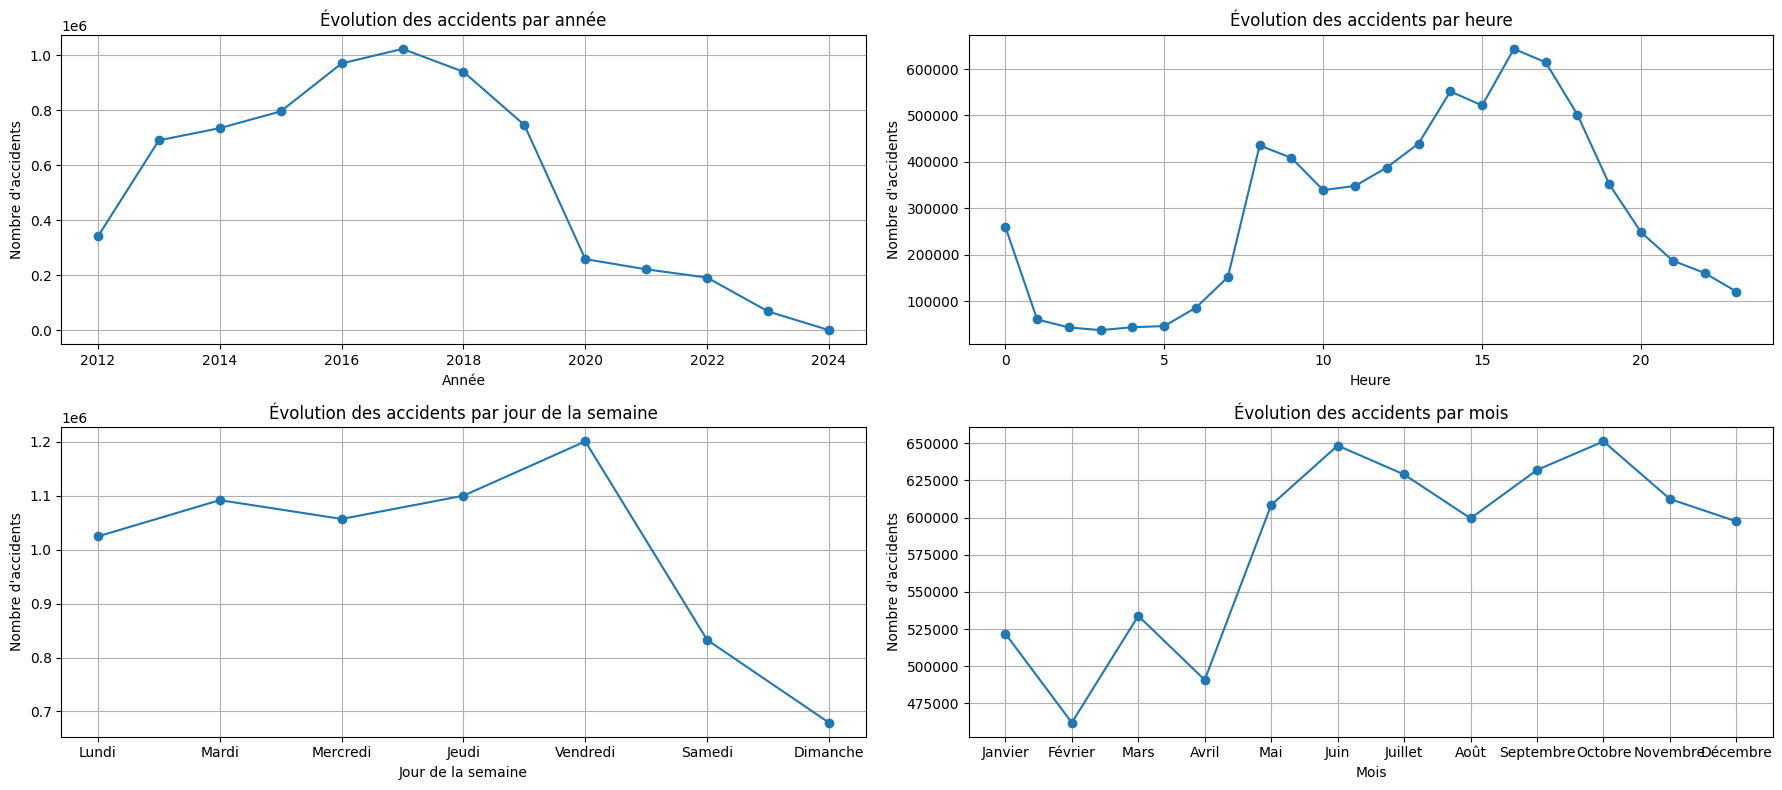

In [29]:
import matplotlib.pyplot as plt

# Créer une grille de sous-graphiques
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

# Tracer l'évolution des accidents au fil des ans
accidents_by_year = accident_data['crash_date'].dt.year.value_counts().sort_index()
axs[0, 0].plot(accidents_by_year.index, accidents_by_year.values, marker='o')
axs[0, 0].set_title('Évolution des accidents par année')
axs[0, 0].set_xlabel('Année')
axs[0, 0].set_ylabel('Nombre d\'accidents')
axs[0, 0].grid(True)

# Tracer l'évolution des accidents par heure
accidents_by_hour = accident_data['crash_time'].dt.hour.value_counts().sort_index()
axs[0, 1].plot(accidents_by_hour.index, accidents_by_hour.values, marker='o')
axs[0, 1].set_title('Évolution des accidents par heure')
axs[0, 1].set_xlabel('Heure')
axs[0, 1].set_ylabel('Nombre d\'accidents')
axs[0, 1].grid(True)

# Tracer l'évolution des accidents par jour de la semaine
accidents_by_day = accident_data['crash_date'].dt.dayofweek.value_counts().sort_index()
days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
axs[1, 0].plot(days, accidents_by_day.values, marker='o')
axs[1, 0].set_title('Évolution des accidents par jour de la semaine')
axs[1, 0].set_xlabel('Jour de la semaine')
axs[1, 0].set_ylabel('Nombre d\'accidents')
axs[1, 0].grid(True)

# Tracer l'évolution des accidents par mois
accidents_by_month = accident_data['crash_date'].dt.month.value_counts().sort_index()
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
axs[1, 1].plot(months, accidents_by_month.values, marker='o')
axs[1, 1].set_title('Évolution des accidents par mois')
axs[1, 1].set_xlabel('Mois')
axs[1, 1].set_ylabel('Nombre d\'accidents')
axs[1, 1].grid(True)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

                                                            Gravité des blessures                                                                              

In [30]:
# Calculer le nombre total de blessés légers, graves et mortels
blessures_legeres = accident_data['number_of_persons_injured'].sum()
blessures_graves = accident_data['number_of_persons_killed'].sum()

print("Nombre total de blessés légers : ", blessures_legeres)
print("Nombre total de blessés graves : ", blessures_graves)

Nombre total de blessés légers :  1830785.0
Nombre total de blessés graves :  4678.0


Ces données fournissent des informations cruciales sur les blessures résultant des accidents de la circulation, en distinguant entre les blessures légères et les blessures graves :
Le nombre total de blessés légers est de 1 830 785. Ces blessures incluent des ecchymoses, des éraflures et d'autres blessures mineures qui nécessitent généralement un traitement médical, mais qui ne mettent pas la vie en danger.
Le nombre total de blessés graves est de 4 678. Ces blessures sont plus graves et peuvent inclure des fractures, des blessures internes ou des traumatismes crâniens, nécessitant souvent une hospitalisation et des soins médicaux spécialisés.

## **III** **<span style='color:blue;'> ANALYSE BIVARIEE </span>**

In [31]:
# Sélection des colonnes d'intérêt 
columns_of_interest = ['contributing_factor_vehicle_1', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'borough']

# Création d'un DataFrame avec les colonnes d'intérêt
df = accident_data[columns_of_interest]

                                            Nombre de piétons blessés par facteurs de contribution                                                   

In [32]:
# Groupement par facteur contributif et calcul de la somme du nombre de piétons blessés pour chaque facteur
pedestrians_injured_by_factor = df.groupby('contributing_factor_vehicle_1')['number_of_pedestrians_injured'].sum()
# Groupement par facteur contributif et calcul de la somme du nombre de piétons tués pour chaque facteur
pedestrians_killed_by_factor = df.groupby('contributing_factor_vehicle_1')['number_of_pedestrians_killed'].sum()

In [33]:
# Tri des résultats par nombre de piétons blessés
top_pedestrians_injured_by_factor = pedestrians_injured_by_factor.sort_values(ascending=False).head(10)

# Créer un DataFrame à partir des valeurs triées
pedestrians_injured_by_factor_df = pd.DataFrame({'Facteur Contributif': top_pedestrians_injured_by_factor.index, 'Nombre de piétons blessés': top_pedestrians_injured_by_factor.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(pedestrians_injured_by_factor_df) // 2 + 1)

# Afficher les occurrences de chaque facteur contributif avec des styles séparés pour chaque ligne
pedestrians_injured_by_factor_df_styled = pedestrians_injured_by_factor_df.style.set_properties(subset=['Nombre de piétons blessés'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Nombre de piétons blessés'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=pedestrians_injured_by_factor_df['Nombre de piétons blessés'].max())

# Afficher le tableau stylisé
pedestrians_injured_by_factor_df_styled

,Facteur Contributif,Nombre de piétons blessés
0,Unspecified,127945
1,Driver Inattention/Distraction,67062
2,Failure to Yield Right-of-Way,35165
3,Backing Unsafely,13364
4,Following Too Closely,12784
5,Other Vehicular,7650
6,Passing or Lane Usage Improper,6605
7,Turning Improperly,6464
8,Fatigued/Drowsy,6426
9,Passing Too Closely,6194


Dans un nombre important d'accidents, la cause précise n'a pas été spécifiée;
La distraction ou l'inattention des conducteurs semble jouer un rôle majeur dans ces accidents, compromettant leur capacité à détecter les piétons et les dangers potentiels sur la route.
Le non-respect de la priorité par les conducteurs est une cause fréquente d'accidents avec des piétons. Cela peut résulter d'un manque de connaissance des règles de priorité ou d'une négligence lors de la traversée de zones piétonnes.
Les accidents survenant lors des manœuvres de marche arrière des véhicules soulignent le besoin de plus de précaution de la part des conducteurs, afin de réduire le risque de collisions avec des piétons.
Suivre les véhicules précédents de trop près accroît le risque d'accidents impliquant des piétons, en laissant peu de temps pour réagir aux situations imprévues.
Effectuer des dépassements ou des changements de voie incorrects peut mettre en danger les piétons traversant la route, soulignant l'importance de respecter les règles de circulation.
Des virages incorrects, en particulier dans les intersections, peuvent créer des situations dangereuses pour les piétons et augmenter le risque d'accidents.
La fatigue ou la somnolence des conducteurs peut altérer leur réactivité et leur capacité à détecter les piétons, contribuant ainsi aux accidents.
Dépasser les autres véhicules de manière imprudente augmente le risque de collisions avec des piétons, en particulier dans des conditions de circulation chargées ou sur des routes étroites.

                                                             Nombre de piétons tués                                                                                             

In [34]:
# Tri des résultats par nombre de piétons tués
top_pedestrians_killed_by_factor = pedestrians_killed_by_factor.sort_values(ascending=False).head(10)

# Créer un DataFrame à partir des valeurs triées
pedestrians_killed_by_factor_df = pd.DataFrame({'Facteur Contributif': top_pedestrians_killed_by_factor.index, 'Nombre de piétons tués': top_pedestrians_killed_by_factor.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(pedestrians_killed_by_factor_df) // 2 + 1)

# Afficher les occurrences de chaque facteur contributif avec des styles séparés pour chaque ligne
pedestrians_killed_by_factor_df_styled = pedestrians_killed_by_factor_df.style.set_properties(subset=['Nombre de piétons tués'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Nombre de piétons tués'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=pedestrians_killed_by_factor_df['Nombre de piétons tués'].max())

# Afficher le tableau stylisé
pedestrians_killed_by_factor_df_styled

,Facteur Contributif,Nombre de piétons tués
0,Unspecified,1110
1,Driver Inattention/Distraction,391
2,Failure to Yield Right-of-Way,258
3,Backing Unsafely,78
4,Traffic Control Disregarded,62
5,Unsafe Speed,59
6,Alcohol Involvement,55
7,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,55
8,Following Too Closely,53
9,Passenger Distraction,45


La cause la plus fréquente des décès de piétons est "non spécifiée" (1110 incidents), mettant en évidence un besoin d'amélioration dans la documentation des circonstances des accidents.
L'inattention/distraction du conducteur est le deuxième facteur le plus courant (391 incidents), soulignant l'importance de la vigilance au volant.
Le non-respect de la priorité par les conducteurs est également une cause fréquente (258 incidents), soulignant l'importance de céder le passage aux piétons.
Les manœuvres de marche arrière non sécurisées contribuent à 78 décès de piétons, soulignant le besoin de prudence dans ces situations.
Le non-respect des règles de circulation, la vitesse excessive et l'implication de l'alcool sont également des facteurs significatifs.
Les erreurs/confusions des piétons/cyclistes, le suivi de trop près et la distraction des passagers contribuent également aux décès de piétons.

                                                       NOMBRE DE CYCLISTE BLESSE                                                                                              

In [35]:
# Analyse bivariable - Croisement avec le nombre de cyclistes blessés
cyclists_injured_by_factor = df.groupby(['contributing_factor_vehicle_1'])['number_of_cyclist_injured'].sum()

In [36]:
# Tri des résultats par nombre de cyclistes blessés
top_cyclists_injured_by_factor = cyclists_injured_by_factor.sort_values(ascending=False).head(10)

# Créer un DataFrame à partir des valeurs triées
cyclists_injured_by_factor_df = pd.DataFrame({'Facteur Contributif': top_cyclists_injured_by_factor.index, 'Nombre de cyclistes blessés': top_cyclists_injured_by_factor.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(cyclists_injured_by_factor_df) // 2 + 1)

# Afficher les occurrences de chaque facteur contributif avec des styles séparés pour chaque ligne
cyclists_injured_by_factor_df_styled = cyclists_injured_by_factor_df.style.set_properties(subset=['Nombre de cyclistes blessés'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Nombre de cyclistes blessés'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=cyclists_injured_by_factor_df['Nombre de cyclistes blessés'].max())

# Afficher le tableau stylisé
cyclists_injured_by_factor_df_styled

,Facteur Contributif,Nombre de cyclistes blessés
0,Unspecified,48656
1,Driver Inattention/Distraction,34211
2,Failure to Yield Right-of-Way,12261
3,Following Too Closely,7012
4,Passing or Lane Usage Improper,4638
5,Backing Unsafely,4397
6,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,4064
7,Other Vehicular,4037
8,Traffic Control Disregarded,3702
9,Passing Too Closely,3471


Les blessures de cyclistes sont principalement causées par des facteurs tels que l'inattention ou la distraction des conducteurs, le non-respect de la priorité, et le suivi de véhicules de trop près. Les manœuvres inadéquates telles que le dépassement incorrect et la marche arrière non sécurisée sont également des causes fréquentes de blessures. De plus, les erreurs ou confusions des piétons/cyclistes contribuent significativement aux accidents

                                                       NOMBRE DE CYCLISTE TUES                                                                                                   

In [37]:
# Analyse bivariable - Croisement avec le nombre de cyclistes tués
cyclists_killed_by_factor = df.groupby(['contributing_factor_vehicle_1'])['number_of_cyclist_killed'].sum()

In [38]:
# Tri des résultats par nombre de cyclistes tués
top_cyclists_killed_by_factor = cyclists_killed_by_factor.sort_values(ascending=False).head(10)

# Créer un DataFrame à partir des valeurs triées
cyclists_killed_by_factor_df = pd.DataFrame({'Facteur Contributif': top_cyclists_killed_by_factor.index, 'Nombre de cyclistes tués': top_cyclists_killed_by_factor.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(cyclists_killed_by_factor_df) // 2 + 1)

# Afficher les occurrences de chaque facteur contributif avec des styles séparés pour chaque ligne
cyclists_killed_by_factor_df_styled = cyclists_killed_by_factor_df.style.set_properties(subset=['Nombre de cyclistes tués'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Nombre de cyclistes tués'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=cyclists_killed_by_factor_df['Nombre de cyclistes tués'].max())

# Afficher le tableau stylisé
cyclists_killed_by_factor_df_styled

,Facteur Contributif,Nombre de cyclistes tués
0,Unspecified,91
1,Driver Inattention/Distraction,53
2,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,32
3,Failure to Yield Right-of-Way,22
4,Traffic Control Disregarded,17
5,Other Vehicular,12
6,Passing or Lane Usage Improper,11
7,Alcohol Involvement,10
8,Unsafe Speed,10
9,Passenger Distraction,8


Les décès de cyclistes sont principalement causés par des facteurs tels que l'inattention ou la distraction des conducteurs, les erreurs ou confusions des piétons/cyclistes, et le non-respect de la priorité. Parmi les autres facteurs contributifs figurent le non-respect des règles de circulation, l'implication d'autres véhicules, et la vitesse excessive. Pour réduire ces tragédies, il est crucial de sensibiliser les conducteurs à la présence des cyclistes sur la route et de renforcer le respect des règles de circulation et de sécurité.

In [39]:
selected_data = accident_data[['contributing_factor_vehicle_1', 'number_of_persons_injured']]

In [40]:
# Regroupez les données par le facteur contributif et calculez le nombre total de blessés pour chaque facteur
grouped_data = selected_data.groupby('contributing_factor_vehicle_1')['number_of_persons_injured'].sum()

In [42]:
# Tri des données groupées par ordre décroissant et sélection des 10 premières lignes
top_contributing_factors = grouped_data.sort_values(ascending=False).head(10)

# Création d'un DataFrame à partir des valeurs triées
top_contributing_factors_df = pd.DataFrame({'Facteur Contributif': top_contributing_factors.index, 'Nombre Total de Blessés': top_contributing_factors.values})

# Appliquer des styles différents à chaque ligne
styles = [{'selector': '', 'props': [('background-color', '#f2f2f2')]}, {'selector': '', 'props': [('background-color', 'white')]}] * (len(top_contributing_factors_df) // 2 + 1)

# Ajouter une représentation sous forme de barres
top_contributing_factors_df_styled = top_contributing_factors_df.style.bar(subset=['Nombre Total de Blessés'], color='#5fba7d', align='mid', width=100)

# Afficher le tableau stylisé
top_contributing_factors_df_styled


,Facteur Contributif,Nombre Total de Blessés
0,Unspecified,600089.000000
1,Driver Inattention/Distraction,374446.000000
2,Failure to Yield Right-of-Way,132958.000000
3,Following Too Closely,113626.000000
4,Backing Unsafely,57052.000000
5,Other Vehicular,50699.000000
6,Passing or Lane Usage Improper,46228.000000
7,Traffic Control Disregarded,42062.000000
8,Fatigued/Drowsy,41720.000000
9,Turning Improperly,40752.000000


"Unspecified" : Ce facteur est le plus fréquent, ce qui indique qu'il existe un nombre significatif d'accidents où la cause précise n'est pas spécifiée. Cela souligne la nécessité d'améliorer la collecte de données et la documentation des accidents pour une meilleure compréhension des causes.

"Driver Inattention/Distraction" : La distraction du conducteur est également très fréquente, ce qui suggère qu'une attention insuffisante pendant la conduite est un facteur majeur contribuant aux blessures dans les accidents.

"Failure to Yield Right-of-Way" : Ne pas céder le passage est également un facteur important, ce qui souligne l'importance du respect des règles de priorité sur la route pour éviter les collisions.

"Following Too Closely" : Suivre de trop près est un autre comportement dangereux qui contribue aux blessures dans les accidents, soulignant l'importance de maintenir une distance de sécurité adéquate entre les véhicules.

D'autres facteurs tels que le changement de voie non sécurisé, la vitesse excessive et l'inexpérience du conducteur sont également associés à un nombre important de blessures dans les accidents.

In [43]:
# Créer une nouvelle colonne pour le jour de la semaine
accident_data['day_of_week'] = accident_data['crash_date'].dt.day_name()

# Grouper les données par jour de la semaine et par facteur contributif
contributing_factors_by_day = accident_data.groupby(['day_of_week', 'contributing_factor_vehicle_1']).size().unstack(fill_value=0)

# Afficher les 10 premiers facteurs contributifs les plus fréquents pour chaque jour de la semaine
top_contributing_factors_by_day = contributing_factors_by_day.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)

In [45]:
from tabulate import tabulate

# Convertir les données DataFrame en liste de listes pour tabulate
table_data = top_contributing_factors_by_day.reset_index().values.tolist()

# En-tête de la table
headers = ['Jour de la semaine'] + list(top_contributing_factors_by_day.columns)

# Afficher la table avec tabulate
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+----------------------+--------------------+----------------------------------+---------------------------------+-------------------+-------------------------+-------------------+-----------------------+----------------------------------+----------------------+---------------+
| Jour de la semaine   |   Backing Unsafely |   Driver Inattention/Distraction |   Failure to Yield Right-of-Way |   Fatigued/Drowsy |   Following Too Closely |   Other Vehicular |   Passing Too Closely |   Passing or Lane Usage Improper |   Turning Improperly |   Unspecified |
+======================+====================+==================================+=================================+===================+=========================+===================+=======================+==================================+======================+===============+
| Friday               |              47037 |                           237626 |                           72701 |             29484 |                   69597 |   

Les vendredis sont associés à un nombre plus élevé d'accidents causés par des manœuvres de marche arrière non sécurisées, une inattention/distraction du conducteur et un défaut de céder le passage.
Les mardis présentent également une fréquence plus élevée d'accidents dus à la fatigue ou à la somnolence, ainsi qu'à un suivi trop rapproché et des virages incorrects.
Les jeudis ont également un nombre significatif d'accidents liés à d'autres facteurs véhiculaires.
Les samedis et dimanches montrent une diminution globale du nombre d'accidents par rapport aux jours ouvrables de la semaine.
En général, les vendredis semblent être les jours les plus critiques en termes d'accidents liés à divers facteurs contributifs, suivis des mardis.

In [46]:
from tabulate import tabulate

# Extraire l'heure de l'accident à partir de la colonne crash_time
accident_data['crash_time_hour'] = accident_data['crash_time'].dt.hour

# Grouper les données par heure et par facteur contributif, puis compter le nombre d'accidents
accidents_by_hour_and_factor = accident_data.groupby(['crash_time_hour', 'contributing_factor_vehicle_1']).size().unstack(fill_value=0)

# Sélectionner les 10 principaux facteurs contributifs pour chaque heure
top_contributing_factors_hour = accidents_by_hour_and_factor.sum().nlargest(10).index
accidents_by_hour_and_factor = accidents_by_hour_and_factor[top_contributing_factors_hour]

# Convertir les données DataFrame en liste de listes pour tabulate
table_data = accidents_by_hour_and_factor.reset_index().values.tolist()

# En-tête de la table
headers = ['Heure'] + list(accidents_by_hour_and_factor.columns)

# Afficher la table avec tabulate
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+---------+---------------+----------------------------------+---------------------------------+-------------------------+--------------------+-------------------+----------------------------------+-----------------------+-------------------+----------------------+
|   Heure |   Unspecified |   Driver Inattention/Distraction |   Failure to Yield Right-of-Way |   Following Too Closely |   Backing Unsafely |   Other Vehicular |   Passing or Lane Usage Improper |   Passing Too Closely |   Fatigued/Drowsy |   Turning Improperly |
+=========+===============+==================================+=================================+=========================+====================+===================+==================================+=======================+===================+======================+
|       0 |         74772 |                            59105 |                           13860 |                   17607 |              10177 |              7655 |                             9792 |    

À minuit, on observe un nombre élevé d'accidents non spécifiés, suivis de près par des cas d'inattention/distraction du conducteur.
Durant les premières heures du matin (entre 1h et 6h), les accidents globaux sont moins nombreux, mais les facteurs tels que l'inattention/distraction du conducteur et la fatigue/somnolence restent significatifs.
Aux heures de pointe du matin (entre 7h et 9h), les accidents liés à la négligence du conducteur et au non-respect des distances de sécurité augmentent.
En fin de matinée et en début d'après-midi (entre 10h et 15h), on observe une baisse globale des accidents, mais certains facteurs comme les manœuvres de recul non sécurisées et le non-respect des distances de sécurité restent préoccupants.
Pendant les heures de l'après-midi (entre 16h et 18h), les accidents liés au non-respect des distances de sécurité et aux dépassements imprudents augmentent à nouveau.
En soirée (entre 19h et 23h), les facteurs contributifs aux accidents varient, mais on observe une prédominance des accidents non spécifiés et de l'inattention/distraction du conducteur.

In [47]:
from tabulate import tabulate

# Créer une nouvelle colonne pour le mois
accident_data['month'] = accident_data['crash_date'].dt.strftime('%B')

# Grouper les données par mois et par facteur contributif, puis compter le nombre d'accidents
accidents_by_month_and_factor = accident_data.groupby(['month', 'contributing_factor_vehicle_1']).size().unstack(fill_value=0)

# Sélectionner les 10 principaux facteurs contributifs pour chaque mois
top_contributing_factors_month = accidents_by_month_and_factor.sum().nlargest(10).index
accidents_by_month_and_factor = accidents_by_month_and_factor[top_contributing_factors_month]

# Convertir les données DataFrame en liste de listes pour tabulate
table_data = accidents_by_month_and_factor.reset_index().values.tolist()

# En-tête de la table
headers = ['Mois'] + list(accidents_by_month_and_factor.columns)

# Afficher la table avec tabulate
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+-----------+---------------+----------------------------------+---------------------------------+-------------------------+--------------------+-------------------+----------------------------------+-----------------------+-------------------+----------------------+
| Mois      |   Unspecified |   Driver Inattention/Distraction |   Failure to Yield Right-of-Way |   Following Too Closely |   Backing Unsafely |   Other Vehicular |   Passing or Lane Usage Improper |   Passing Too Closely |   Fatigued/Drowsy |   Turning Improperly |
+===========+===============+==================================+=================================+=========================+====================+===================+==================================+=======================+===================+======================+
| April     |        168059 |                            96679 |                           28682 |                   30657 |              19984 |             13796 |                            151

En avril, les accidents non spécifiés sont particulièrement élevés, suivis de près par l'inattention/distraction du conducteur.
En août, les accidents sont généralement plus nombreux, avec une répartition similaire des facteurs contributifs, mais une augmentation des cas de fatigue/somnolence.
En décembre, on observe une répartition des accidents similaire à celle d'août, mais avec une légère augmentation des accidents liés à la négligence du conducteur.
En février et janvier, les facteurs contributifs aux accidents sont comparables, avec une prédominance des accidents non spécifiés et de l'inattention/distraction du conducteur.
En juillet et juin, les accidents non spécifiés sont également élevés, mais on observe une augmentation des accidents liés à la négligence du conducteur et au non-respect des distances de sécurité.
En mars, la répartition des accidents est similaire à celle d'avril, mais avec une diminution des cas d'inattention/distraction du conducteur

In [48]:
from tabulate import tabulate

# Créer une nouvelle colonne pour l'année
accident_data['year'] = accident_data['crash_date'].dt.year

# Grouper les données par année et par facteur contributif, puis compter le nombre d'accidents
accidents_by_year_and_factor = accident_data.groupby(['year', 'contributing_factor_vehicle_1']).size().unstack(fill_value=0)

# Sélectionner les 10 principaux facteurs contributifs pour chaque année
top_contributing_factors_year = accidents_by_year_and_factor.sum().nlargest(10).index
accidents_by_year_and_factor = accidents_by_year_and_factor[top_contributing_factors_year]

# Convertir les données DataFrame en liste de listes pour tabulate
table_data = accidents_by_year_and_factor.reset_index().values.tolist()

# En-tête de la table
headers = ['Année'] + list(accidents_by_year_and_factor.columns)

# Afficher la table avec tabulate
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+---------+---------------+----------------------------------+---------------------------------+-------------------------+--------------------+-------------------+----------------------------------+-----------------------+-------------------+----------------------+
|   Année |   Unspecified |   Driver Inattention/Distraction |   Failure to Yield Right-of-Way |   Following Too Closely |   Backing Unsafely |   Other Vehicular |   Passing or Lane Usage Improper |   Passing Too Closely |   Fatigued/Drowsy |   Turning Improperly |
+=========+===============+==================================+=================================+=========================+====================+===================+==================================+=======================+===================+======================+
|    2012 |        201821 |                            35389 |                           13668 |                     233 |               8206 |              7968 |                              188 |    

En 2012, les accidents non spécifiés sont prédominants, mais on observe également une proportion significative d'accidents dus à l'inattention/distraction du conducteur.
En 2013 et 2014, les accidents non spécifiés sont toujours les plus fréquents, mais on observe une augmentation des accidents liés à la fatigue/somnolence et à la négligence du conducteur.
En 2015, les accidents non spécifiés restent élevés, mais on observe une augmentation des accidents liés à la fatigue/somnolence et à la négligence du conducteur.
En 2016, les accidents liés à la négligence du conducteur, au non-respect des distances de sécurité et à l'inattention/distraction du conducteur sont significativement élevés.
En 2017 et 2018, on observe une répartition similaire des facteurs contributifs, avec une diminution des accidents non spécifiés et une augmentation des accidents liés à la négligence du conducteur et à l'inattention/distraction.
En 2019, les accidents liés à la négligence du conducteur et à l'inattention/distraction du conducteur restent élevés, mais on observe une diminution des accidents non spécifiés.
En 2020, on observe une diminution globale du nombre d'accidents, mais les facteurs contributifs restent similaires aux années précédentes.
En 2021 et 2022, les accidents liés à la négligence du conducteur et à l'inattention/distraction du conducteur restent élevés, mais on observe une diminution globale du nombre d'accidents.
En 2023 et 2024, les données sont incomplètes, mais les tendances générales semblent se maintenir, avec une diminution des accidents non spécifiés et une prédominance des accidents liés à la négligence du conducteur et à l'inattention/distraction.

In [49]:
from tabulate import tabulate

# Grouper les données par ville et par facteur contributif, puis compter le nombre d'accidents
accidents_by_borough_and_factor = accident_data.groupby(['borough', 'contributing_factor_vehicle_1']).size().unstack(fill_value=0)

# Sélectionner les 10 principaux facteurs contributifs pour chaque ville
top_contributing_factors_borough = accidents_by_borough_and_factor.sum().nlargest(10).index
accidents_by_borough_and_factor = accidents_by_borough_and_factor[top_contributing_factors_borough]

# Convertir les données DataFrame en liste de listes pour tabulate
table_data = accidents_by_borough_and_factor.reset_index().values.tolist()

# En-tête de la table
headers = ['Ville'] + list(accidents_by_borough_and_factor.columns)

# Afficher la table avec tabulate
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+---------------+---------------+----------------------------------+---------------------------------+-------------------------+--------------------+-------------------+----------------------------------+-----------------------+-------------------+----------------------+
| Ville         |   Unspecified |   Driver Inattention/Distraction |   Failure to Yield Right-of-Way |   Following Too Closely |   Backing Unsafely |   Other Vehicular |   Passing or Lane Usage Improper |   Passing Too Closely |   Fatigued/Drowsy |   Turning Improperly |
+===============+===============+==================================+=================================+=========================+====================+===================+==================================+=======================+===================+======================+
| BRONX         |        246387 |                           121774 |                           36356 |                   32573 |              27061 |             22362 |               

À Bronx, les accidents non spécifiés sont prédominants, suivis par l'inattention/distraction du conducteur et le non-respect de la distance de sécurité.
À Brooklyn, on observe une prédominance de l'inattention/distraction du conducteur, du non-respect de la distance de sécurité et de la négligence du conducteur.
À Manhattan, les facteurs contributifs les plus fréquents sont l'inattention/distraction du conducteur, le non-respect de la distance de sécurité et la fatigue/somnolence.
À Queens, les facteurs contributifs les plus fréquents sont similaires à ceux de Manhattan, avec une prédominance de l'inattention/distraction du conducteur et du non-respect de la distance de sécurité.
À Staten Island, les accidents non spécifiés sont également prédominants, suivis de l'inattention/distraction du conducteur et du non-respect de la distance de sécurité

**En resume**, À partir de l'analyse des données sur les facteurs contributifs aux accidents de la circulation en fonction de l'heure, du jour de la semaine, du mois, de l'année et de la ville, plusieurs conclusions générales peuvent être tirées :

Heure de la journée : Les heures de pointe, comme le début de la matinée et la fin de l'après-midi, semblent être associées à un nombre plus élevé d'accidents. Cela suggère que la congestion routière et la fatigue peuvent contribuer à une conduite moins sûre pendant ces périodes.

Jour de la semaine : Les week-ends, en particulier le vendredi et le samedi, montrent souvent un nombre plus élevé d'accidents par rapport aux jours de semaine. Cela pourrait être dû à une augmentation du trafic liée aux déplacements récréatifs et aux activités sociales.

Mois de l'année : Les mois d'été semblent avoir un nombre plus élevé d'accidents, ce qui pourrait être lié à une augmentation des voyages et des activités de plein air pendant cette période.

Année : Une tendance à la baisse du nombre d'accidents peut être observée au fil des années, ce qui pourrait indiquer une amélioration générale de la sécurité routière, peut-être grâce à des mesures de sécurité accrues et à une sensibilisation accrue du public.

Ville : Chaque ville présente ses propres défis en matière de sécurité routière, avec des facteurs contributifs spécifiques prédominants. Il est crucial pour les autorités locales de comprendre ces variations et d'élaborer des stratégies adaptées pour réduire les risques d'accidents.

## *Graphiques des facteurs contributifs aux accidents par heures,jours,semaine,mois,annee*

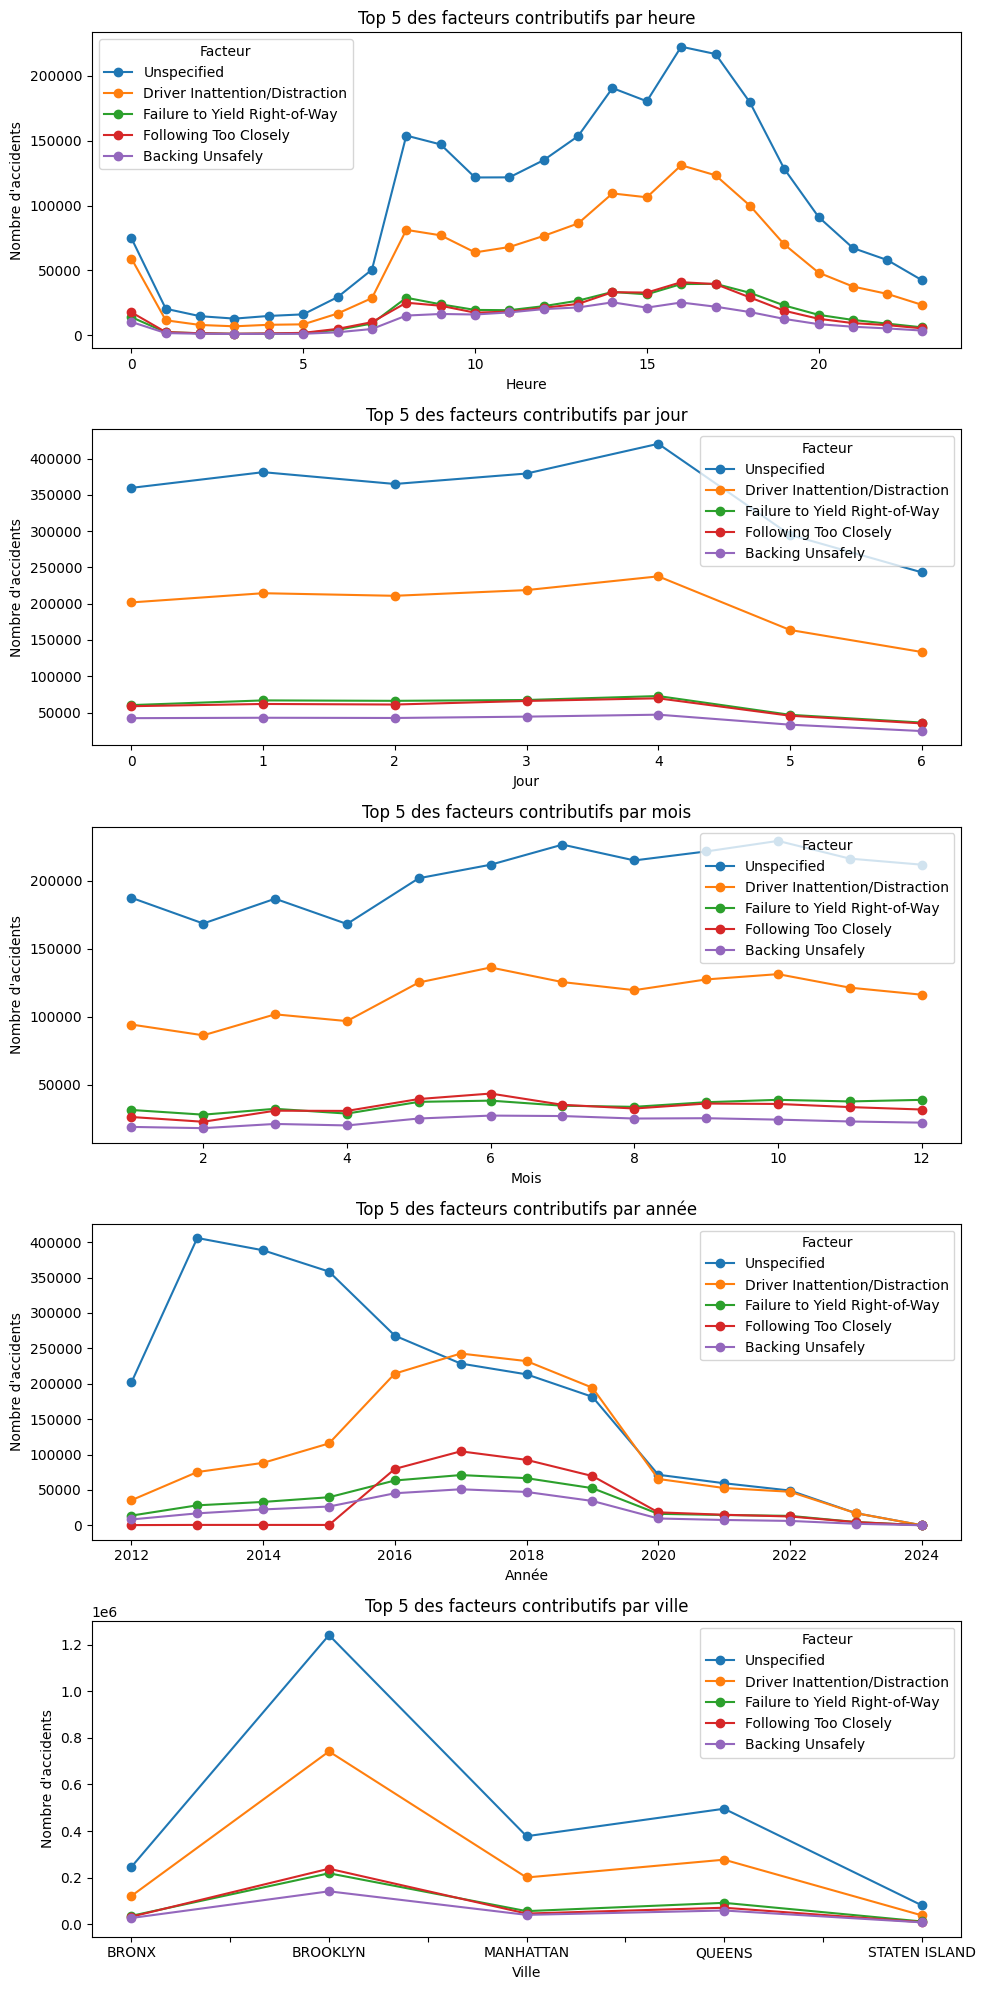

In [54]:
import matplotlib.pyplot as plt

# Définir les catégories de temps et les villes
categories = {
    'heure': accident_data['crash_time'].dt.hour,
    'jour': accident_data['crash_date'].dt.dayofweek,
    'mois': accident_data['crash_date'].dt.month,
    'année': accident_data['crash_date'].dt.year,
    'ville': accident_data['borough']
}

# Définir les sous-plots
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Parcourir chaque catégorie
for i, (cat_name, cat_data) in enumerate(categories.items()):
    # Compter les occurrences des facteurs contributifs pour chaque catégorie
    contributing_factors_count = accident_data.groupby([cat_data, 'contributing_factor_vehicle_1']).size().unstack().fillna(0)
    # Sélectionner les top 5 facteurs contributifs
    top_5_contributing_factors = contributing_factors_count.sum().sort_values(ascending=False).head(5).index
    # Filtrer les données pour inclure uniquement les top 5 facteurs contributifs
    contributing_factors_count = contributing_factors_count[top_5_contributing_factors]
    # Tracer l'évolution des top 5 facteurs contributifs
    contributing_factors_count.plot(ax=axs[i], marker='o')
    axs[i].set_title(f'Top 5 des facteurs contributifs par {cat_name}')
    axs[i].set_xlabel(cat_name.capitalize())
    axs[i].set_ylabel('Nombre d\'accidents')
    axs[i].legend(title='Facteur')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

##   **IV** **<span style='color:blue;'> LA MODELISATION </span>** 

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Définir une colonne cible indiquant si un accident s'est produit ou non
accident_data['accident_occurred'] = (accident_data['number_of_persons_injured'] > 0) | (accident_data['number_of_persons_killed'] > 0)

# Sélectionner les caractéristiques pertinentes pour la modélisation
features = ['number_of_cyclist_injured', 'number_of_motorist_injured', 'crash_time_hour', 'contributing_factor_vehicle_1', 'borough', 'day_of_week', 'month']

# Séparation des caractéristiques et de la cible
X = accident_data[features]
y = accident_data['accident_occurred']

# Fractionnement des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Définir une colonne cible indiquant si un accident s'est produit ou non
accident_data['accident_occurred'] = (accident_data['number_of_persons_injured'] > 0) | (accident_data['number_of_persons_killed'] > 0)

# Supprimer les colonnes non pertinentes si nécessaire
selected_features = ['number_of_cyclist_injured', 'number_of_motorist_injured', 'crash_time_hour', 
                     'contributing_factor_vehicle_1', 'borough', 'day_of_week', 'month']

accident_data_selected = accident_data[selected_features]

# Définir la cible
accident_data_selected['accident_occurred'] = (accident_data['number_of_persons_injured'] > 0) | (accident_data['number_of_persons_killed'] > 0)
y = accident_data_selected['accident_occurred']

# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(accident_data_selected.drop(columns='accident_occurred'), y, test_size=0.2, random_state=42)

# Colonnes numériques
numeric_features = ['number_of_cyclist_injured', 'number_of_motorist_injured', 'crash_time_hour']

# Colonnes catégorielles
categorical_features = ['contributing_factor_vehicle_1', 'borough', 'day_of_week', 'month']

# Pipeline de prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline complet avec le modèle de régression logistique
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Entraînement du modèle
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


C:\Users\pc\AppData\Local\Temp\ipykernel_3712\2139673722.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_data_selected['accident_occurred'] = (accident_data['number_of_persons_injured'] > 0) | (accident_data['number_of_persons_killed'] > 0)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy: 0.9516764777865083
              precision    recall  f1-score   support

       False       0.94      1.00      0.97   1124731
        True       1.00      0.75      0.86    272663

    accuracy                           0.95   1397394
   macro avg       0.97      0.88      0.91   1397394
weighted avg       0.95      0.95      0.95   1397394



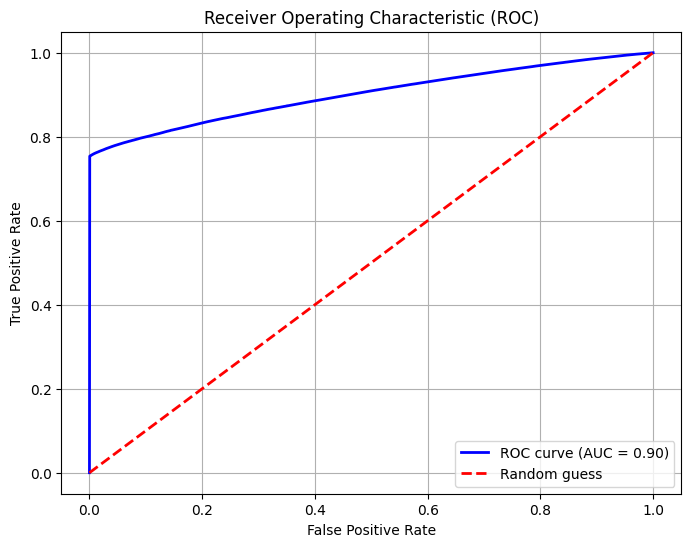

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Prédire les probabilités des classes positives (classe 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculer le taux de faux positifs et le taux de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC (Area Under the Curve) pour évaluer la performance globale du modèle
auc = roc_auc_score(y_test, y_prob)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


L'objectif de ce modèle est de prédire si un accident s'est produit ou non, en se basant sur diverses caractéristiques telles que le nombre de cyclistes blessés, le nombre de conducteurs blessés, l'heure de l'accident, le facteur contributif principal, le quartier où l'accident s'est produit, ainsi que le jour de la semaine et le mois.

En utilisant ces caractéristiques, le modèle vise à fournir une estimation précise de la probabilité qu'un accident se produise dans une situation donnée.
L'évaluation du modèle de prédiction des accidents révèle une performance globalement solide, mais avec des nuances importantes. Avec une précision de 95,17%, le modèle a correctement classifié la grande majorité des échantillons. Cependant, en examinant de plus près les résultats, on constate que le modèle a une précision de 94% pour prédire les non-accidents (False), ce qui indique une capacité élevée à éviter les faux positifs. En revanche, la précision pour les accidents (True) est de 100%, ce qui suggère une tendance à ne prédire que les accidents confirmés.

Le rappel, qui mesure la capacité du modèle à identifier tous les vrais positifs, révèle une performance légèrement moins satisfaisante. Le modèle a un rappel de 100% pour les non-accidents, ce qui signifie qu'il a correctement identifié tous les non-accidents. Cependant, pour les accidents, le rappel est de 75%, ce qui indique que le modèle n'a réussi à identifier que 75% des vrais accidents.

Le F1-score, qui combine la précision et le rappel en une seule mesure, montre une performance équilibrée mais avec une marge de progression. Avec un F1-score de 0,97 pour les non-accidents et de 0,86 pour les accidents, le modèle démontre une bonne capacité à maintenir un équilibre entre la précision et le rappel.

En résumé, bien que le modèle soit généralement précis, il pourrait bénéficier d'une amélioration de sa capacité à identifier les vrais accidents sans augmenter de manière significative le nombre de faux positifs.


Ce modèle a été construit dans le but de prédire la probabilité d'occurrence d'accidents de la route. J'ai choisi ces caractéristiques spécifiques, telles que le nombre de cyclistes et de conducteurs blessés ainsi que l'heure de l'accident, car elles sont souvent liées à la gravité des accidents. En comprenant ces facteurs, nous pouvons mieux comprendre les schémas et les tendances des accidents de la route, ce qui peut à son tour aider à orienter les efforts de prévention et à améliorer la sécurité routière. En identifiant les moments et les conditions associés à un risque accru d'accidents, les autorités peuvent mettre en œuvre des mesures proactives pour réduire les risques et protéger la vie des usagers de la route

****
***
***
***

#   **V**            **<span style='color:blue;'> CONCLUSION </span>**     

Après une analyse approfondie des données sur les accidents de la route, on peut deduire que les comportements négligents des conducteurs, tels que l'inattention/distraction, le non-respect des priorités et le suivi trop serré, sont des facteurs prédominants dans les accidents. Par exemple, l'inattention au volant peut inclure l'utilisation du téléphone portable pendant la conduite, comme observé dans de nombreux cas d'accidents causés par des conducteurs distraits.
Tendances temporelles et spatiales :
Certains jours de la semaine et heures de la journée présentent des taux d'accidents plus élevés. Par exemple, les données révèlent une augmentation significative des accidents les vendredis après-midi, ce qui pourrait être lié à une combinaison de fatigue accrue, de circulation intense et de comportements imprudents avant le week-end.
Impact des interventions basées sur les données : En analysant les données, il est observé qu'entre 7 heures et 9 heures du matin, ainsi qu'entre 16 heures et 18 heures les vendredis, les usagers de la route traversant les rues de Brooklyn ou de Queens présentent un risque significativement accru d'accident ou de collision avec des conducteurs inattentifs ou distraits et ceci surtout en été.

 ***
***
***